In [1]:
from brainspace.plotting import plot_hemispheres
from brainspace.datasets import load_parcellation
from brainspace.utils.parcellation import map_to_labels 
from brainspace.datasets import load_conte69
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nilearn import plotting
import ptitprince as pt
import nibabel as nb
import seaborn as sns

plt.rcParams["pdf.fonttype"]=42  #export as editable text
plt.rcParams["ps.fonttype"]=42
plt.rcParams["svg.fonttype"]="none" #export as editable text
plt.rcParams['axes.linewidth'] = 0.8

/data/u_ajohn_software/anaconda3/envs/thalamus_AJ/lib/python3.7/site-packages/nilearn/datasets/__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


## color in Gradient 1 und 2 with functional conn gradient loadings

## functional connectivity gradient 1

In [2]:
#load gradients
gradients=np.load("/data/p_02666/Project1_thalamus/structural_connectivity/parcels_200/gradients_rh.npy")
gradient1=gradients[:,0]
gradient2=gradients[:,1]

func_grad=np.load("/data/p_02666/Project1_thalamus/functional_connectivity/gradients_right.npy")
func_grad1=func_grad[:,0]
func_grad2=func_grad[:,1]

### plot func grad 1 on thalamus

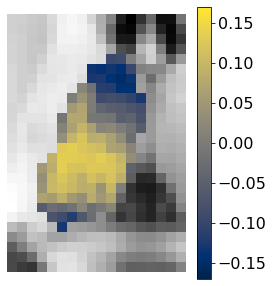

In [3]:
#mni background
mni=nb.load("/afs/.cbs.mpg.de/software/.fsl/6.0.3/debian-bullseye-amd64/data/standard/MNI152_T1_2mm.nii.gz").get_fdata()
slice_mni= mni[31:49,42:68,39]

#thomas atlas in 2mm
func_img_data=nb.load("/data/p_02666/Project1_thalamus/functional_connectivity/gradient1_right_tha.nii.gz").get_fdata()
func_img_data[np.where(func_img_data==0)] = np.NaN
#select slice
slice_= func_img_data[31:49,42:68,39]

#plot
fig, ax = plt.subplots(1, figsize=((4,5)))
cax=plt.imshow(slice_mni.T, cmap="gray", origin="lower")
cax=plt.imshow(slice_.T, cmap="cividis", vmin=-0.17, vmax= 0.17, origin="lower")
plt.axis("off")
cbar = fig.colorbar(cax, orientation='vertical')
cbar.ax.tick_params(labelsize=16)
plt.savefig("/data/p_02666/Project1_thalamus/plots/figure2/func_grad1_on_thalamus_right.pdf", transparent=True, format='pdf', dpi=600)


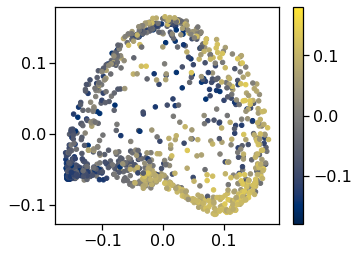

In [9]:
fig, ax=plt.subplots(1, figsize=(5,4))
fig = sns.set_context("notebook", font_scale=1, rc={ 'font.family':'Arial'})

fig = plt.scatter(gradient1, gradient2, c=func_grad1, cmap="cividis", alpha=1,s=20,
                 vmin=-0.18, vmax=0.18) 
#ax.set_xlabel("gradient 1", fontsize = 22, fontname="Arial", labelpad=8)
#ax.set_ylabel("gradient 2", fontsize = 22, fontname="Arial", labelpad=8)
ax.set_yticks([-0.1,0.0,0.1])
ax.tick_params(labelsize=16)
cbar=plt.colorbar()
cbar.ax.tick_params(labelsize=16)

plt.savefig("/data/p_02666/Project1_thalamus/plots/figure2/func1_distribution_right.svg", transparent=True, format='svg', dpi=600)

# plot correlation

[]

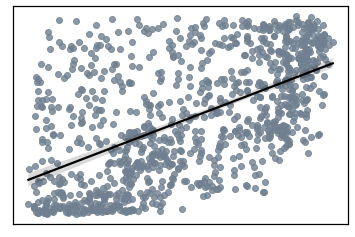

In [5]:
fig, ax=plt.subplots(1, figsize=(6,4))
data=pd.DataFrame()
data["func_g1"]=func_grad1
data["G1"]=gradient1
fig=sns.regplot(x="func_g1", y="G1", data=data,
                scatter_kws={"color": "slategrey", 'alpha':0.8}, 
                line_kws={"color": "black"})
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_xticks([])
ax.set_yticks([])
#plt.savefig("/data/p_02666/Project1_thalamus/plots/figure2/scatter_func1-g1_right.svg", transparent=True, format='svg', dpi=600)

[]

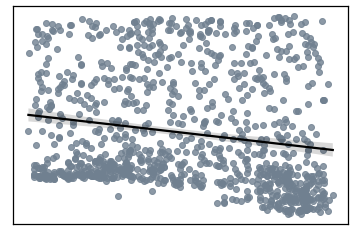

In [6]:
fig, ax=plt.subplots(1, figsize=(6,4))
data=pd.DataFrame()
data["func_g1"]=func_grad1
data["G2"]=gradient2
fig=sns.regplot(x="func_g1", y="G2", data=data,
                scatter_kws={"color": "slategrey", 'alpha':0.8}, 
                line_kws={"color": "black"})
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_xticks([])
ax.set_yticks([])
#plt.savefig("/data/p_02666/Project1_thalamus/plots/figure2/scatter_func1-g2_right.svg", transparent=True, format='svg', dpi=600)

## functional connectivity gradient 2

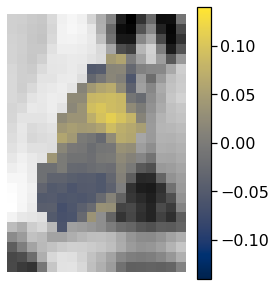

In [7]:
#mni background
mni=nb.load("/afs/.cbs.mpg.de/software/.fsl/6.0.3/debian-bullseye-amd64/data/standard/MNI152_T1_2mm.nii.gz").get_fdata()
slice_mni= mni[31:49,42:68,39]

#thomas atlas in 2mm
func_img_data=nb.load("/data/p_02666/Project1_thalamus/functional_connectivity/gradient2_right_tha.nii.gz").get_fdata()
func_img_data[np.where(func_img_data==0)] = np.NaN
#select slice
slice_= func_img_data[31:49,42:68,39]

#plot
fig, ax = plt.subplots(1, figsize=((4,5)))
colormap=sns.cubehelix_palette(start=2, rot=1, dark=0.3, light=0.9, reverse=True, as_cmap=True)
cax=plt.imshow(slice_mni.T, cmap="gray", origin="lower")
cax=plt.imshow(slice_.T, cmap="cividis", origin="lower", vmin=-0.14, vmax=0.14)
plt.axis("off")
cbar = fig.colorbar(cax, orientation='vertical')
cbar.ax.tick_params(labelsize=16)
plt.savefig("/data/p_02666/Project1_thalamus/plots/figure2/func_grad2_on_thalamus_right.pdf", transparent=True, format='pdf', dpi=600)


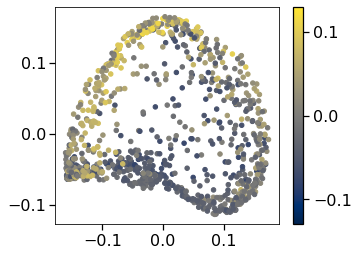

In [8]:
plt.rcParams['axes.linewidth'] = 0.8
fig, ax=plt.subplots(1, figsize=(5,4))
fig = sns.set_context("notebook", font_scale=1, rc={ 'font.family':'Arial'})

fig = plt.scatter(gradient1, gradient2, c=func_grad2, cmap="cividis", alpha=1,s=20,
                 vmin=-0.13, vmax=0.13) 
#ax.set_xlabel("gradient 1", fontsize = 22, fontname="Arial", labelpad=8)
#ax.set_ylabel("gradient 2", fontsize = 22, fontname="Arial", labelpad=8)
ax.set_yticks([-0.1,0.0,0.1])
ax.tick_params(labelsize=16)
cbar=plt.colorbar()
cbar.ax.tick_params(labelsize=16)
cbar.set_ticks([-0.1,0.0,0.1])


plt.savefig("/data/p_02666/Project1_thalamus/plots/figure2/func2_distribution_left.svg", transparent=True, format='svg', dpi=600)

## plot correlations

[]

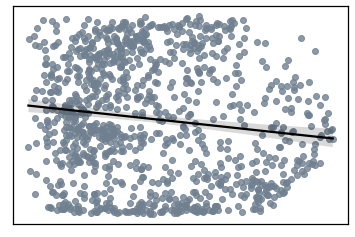

In [10]:
fig, ax=plt.subplots(1, figsize=(6,4))
data=pd.DataFrame()
data["func_g2"]=func_grad2
data["G1"]=gradient1
fig=sns.regplot(x="func_g2", y="G1", data=data,
                scatter_kws={"color": "slategrey", 'alpha':0.8}, 
                line_kws={"color": "black"})
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_xticks([])
ax.set_yticks([])
#plt.savefig("/data/p_02666/Project1_thalamus/plots/figure2/scatter_func2-g1_right.svg", transparent=True, format='svg', dpi=600)

[]

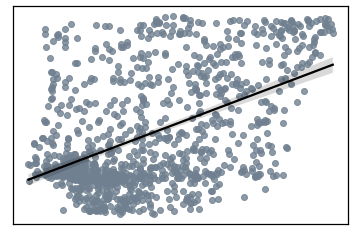

In [11]:
fig, ax=plt.subplots(1, figsize=(6,4))
data=pd.DataFrame()
data["func_g2"]=func_grad2
data["G2"]=gradient2
fig=sns.regplot(x="func_g2", y="G2", data=data,
                scatter_kws={"color": "slategrey", 'alpha':0.8}, 
                line_kws={"color": "black"})
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_xticks([])
ax.set_yticks([])
#plt.savefig("/data/p_02666/Project1_thalamus/plots/figure2/scatter_func2-g2_right.svg", transparent=True, format='svg', dpi=600)